# Credit Risk Assessment & Customer Default Prediction

## 1. Project Overview
This project focuses on building an end-to-end credit risk assessment model to predict the probability of customer default.
The solution is designed to support data-driven credit approval and risk management decisions in financial institutions.

## 2. Business Objective
The objective of this project is to:
- Predict whether a customer is likely to default on credit payment
- Identify key factors influencing default behavior
- Segment customers into risk categories to support informed lending decisions

## 3. Data Understanding
This section focuses on understanding the structure, features, and quality of the dataset.
It includes an initial review of variables, data types, and basic statistics to assess suitability for credit risk modeling.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show all columns in output
pd.set_option('display.max_columns', None)

In [7]:
# Load dataset
file_path = '/content/drive/MyDrive/credit-risk-assessment/data/raw/credit_card_default.csv'
df = pd.read_csv(file_path)

# Show first 5 rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
# Number of rows and columns
print("Dataset shape:", df.shape)

# Column data types and non-null counts
df.info()

Dataset shape: (30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL

In [9]:
# Missing values
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


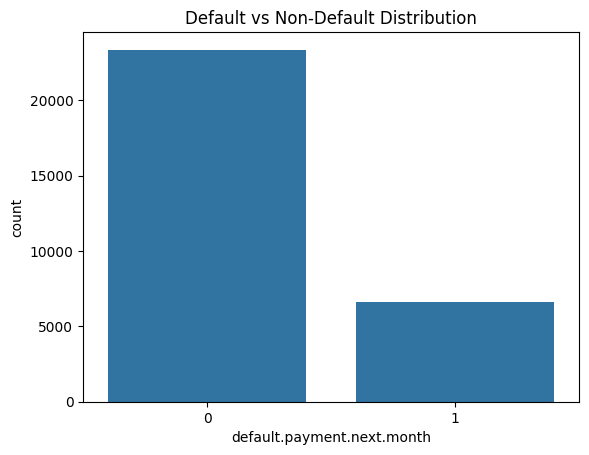

In [10]:
# Target distribution
target = 'default.payment.next.month'
print(df[target].value_counts(normalize=True))

# Visualize
sns.countplot(x=target, data=df)
plt.title('Default vs Non-Default Distribution')
plt.show()

In [11]:
df['default.payment.next.month'].value_counts(normalize=True) * 100

,proportion
default.payment.next.month,
0,77.88
1,22.12


**Insight:**  
The dataset shows class imbalance, with significantly fewer default cases compared to non-defaults.  
This is common in real-world credit risk data and will be addressed during model training using appropriate evaluation metrics.

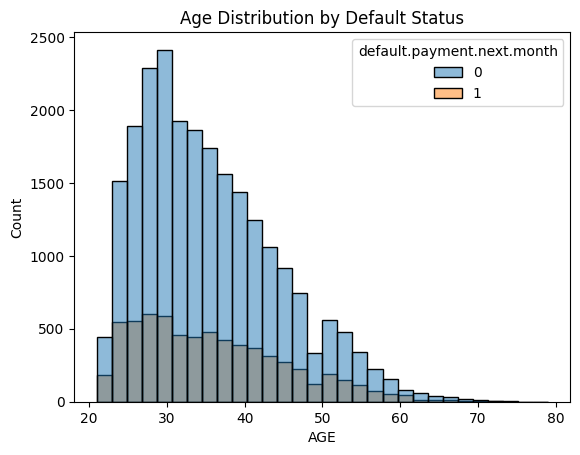

In [12]:
plt.figure()
sns.histplot(data=df, x='AGE', hue='default.payment.next.month', bins=30)
plt.title('Age Distribution by Default Status')
plt.show()

**Insight:**  
Younger customers show relatively higher default rates, indicating age may be a contributing risk factor.

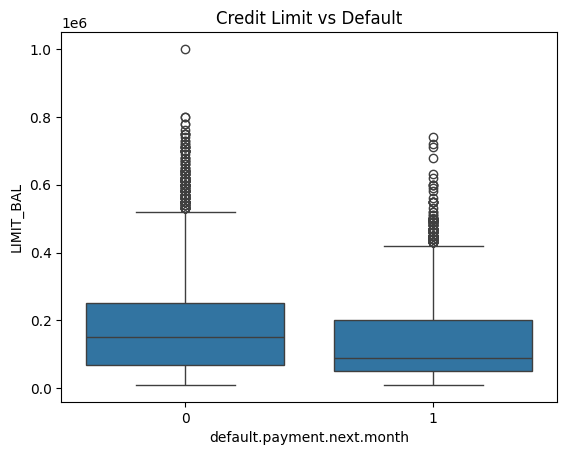

In [13]:
plt.figure()
sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', data=df)
plt.title('Credit Limit vs Default')
plt.show()

**Insight:**  
Customers with lower credit limits tend to default more frequently, suggesting credit exposure is linked to repayment behavior.

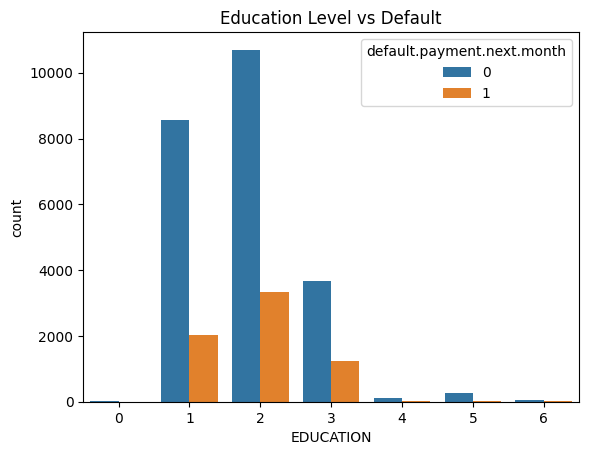

In [14]:
plt.figure()
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df)
plt.title('Education Level vs Default')
plt.show()

**Insight:**  
Default behavior varies across education levels, indicating demographic segmentation can improve risk profiling.

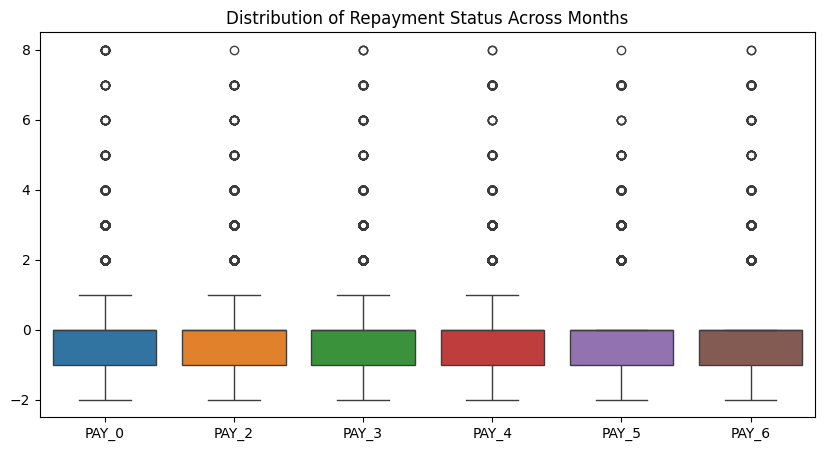

In [15]:
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

plt.figure(figsize=(10,5))
sns.boxplot(data=df[pay_cols])
plt.title('Distribution of Repayment Status Across Months')
plt.show()

**Insight:**  
Consistent delays in repayment strongly correlate with higher default probability, making payment history one of the most critical predictors.

## 4. Feature Engineering & Data Preparation

In this step, raw variables are transformed into meaningful features suitable for machine learning models.  
This includes handling categorical variables, removing non-informative columns, and preparing the target variable.

In [16]:
df = df.drop(columns=['ID'])

The customer ID column was removed as it does not contribute predictive value.

In [17]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

df[cat_cols] = df[cat_cols].astype('category')

In [18]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

Categorical variables were converted using one-hot encoding to ensure compatibility with statistical and machine learning models.

In [19]:
X = df_encoded.drop('default.payment.next.month', axis=1)
y = df_encoded['default.payment.next.month']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Stratified sampling was used to preserve class distribution due to imbalance in default cases.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature scaling ensures numerical stability and improves performance of distance-based and statistical models.

## 5. Credit Risk Modeling – Logistic Regression

Logistic Regression is used to predict the probability of default based on customer demographics, credit exposure, and repayment history.

In [22]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = log_model.predict(X_test_scaled)
y_pred_prob = log_model.predict_proba(X_test_scaled)[:, 1]

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [26]:
confusion_matrix(y_test, y_pred)

array([[4529,  144],
       [1003,  324]])

In [27]:
roc_auc_score(y_test, y_pred_prob)

np.float64(0.7100800813278867)

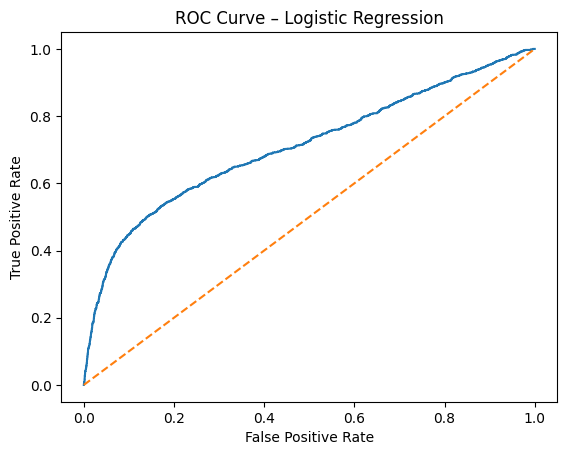

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.show()

The ROC curve demonstrates the model’s ability to distinguish between default and non-default customers.

In [29]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)

,Feature,Coefficient
2,PAY_0,0.660328
27,MARRIAGE_1,0.559916
28,MARRIAGE_2,0.470747
21,EDUCATION_1,0.215384
22,EDUCATION_2,0.176018
29,MARRIAGE_3,0.117091
23,EDUCATION_3,0.107497
9,BILL_AMT2,0.106244
4,PAY_3,0.093958
3,PAY_2,0.093340


Positive coefficients indicate higher default risk, while negative coefficients reduce default probability.
Payment delays and credit utilization emerge as key risk drivers.

### Business Interpretation

• Customers with repeated payment delays show significantly higher default risk  
• Lower credit limits are associated with higher default probability  
• Repayment behavior is a stronger predictor than demographic variables  

These insights can be used by financial institutions to improve credit approval and risk mitigation strategies.

## 6. Model Validation & Threshold Optimization

This step evaluates model robustness and determines an optimal probability threshold for classifying default risk.

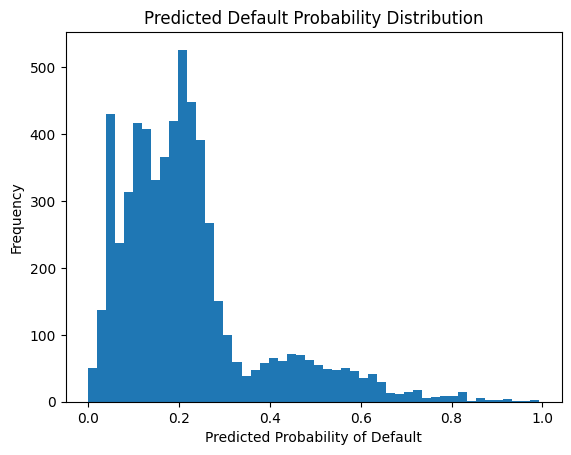

In [30]:
plt.figure()
plt.hist(y_pred_prob, bins=50)
plt.xlabel('Predicted Probability of Default')
plt.ylabel('Frequency')
plt.title('Predicted Default Probability Distribution')
plt.show()

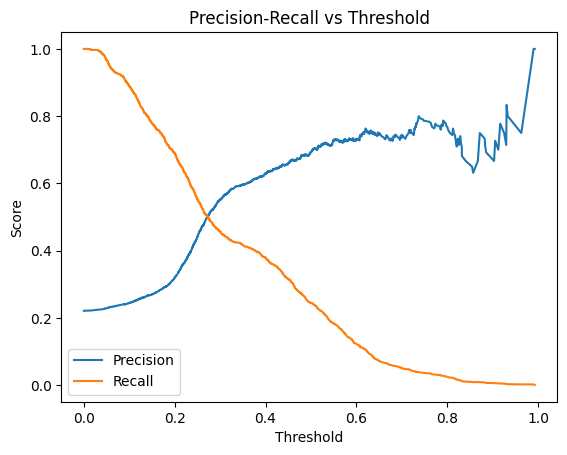

In [31]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.show()

In [32]:
custom_threshold = 0.35
y_pred_custom = (y_pred_prob >= custom_threshold).astype(int)

In [33]:
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4673
           1       0.60      0.42      0.49      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000



In [34]:
confusion_matrix(y_test, y_pred_custom)

array([[4298,  375],
       [ 775,  552]])

### Threshold Optimization – Business Impact

Instead of using the default 0.5 threshold, a lower cutoff was selected to reduce false negatives
(high-risk customers incorrectly approved).

This approach helps financial institutions:
• Minimize credit losses  
• Improve early risk detection  
• Balance portfolio risk with business growth

In [35]:
train_auc = roc_auc_score(y_train, log_model.predict_proba(X_train_scaled)[:,1])
test_auc = roc_auc_score(y_test, y_pred_prob)

train_auc, test_auc

(np.float64(0.7297135269442659), np.float64(0.7100800813278867))

Comparable train and test AUC values indicate that the model generalizes well and is not overfitting.

## 7. Credit Risk Segmentation

Customers are segmented into risk categories based on predicted probability of default.
This helps financial institutions take differentiated actions for each risk group.

In [36]:
import numpy as np

def risk_segment(prob):
    if prob < 0.2:
        return 'Low Risk'
    elif prob < 0.5:
        return 'Medium Risk'
    else:
        return 'High Risk'

risk_segments = pd.Series(y_pred_prob).apply(risk_segment)

In [37]:
risk_df = X_test.copy()
risk_df['Default_Probability'] = y_pred_prob
risk_df['Risk_Segment'] = risk_segments.values

risk_df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,Default_Probability,Risk_Segment
6907,50000.0,46,-1,-1,-1,-1,0,0,1540.0,26060.0,0.0,2650.0,3320.0,2764.0,26060.0,0.0,3472.0,2320.0,1764.0,2841.0,False,False,True,False,False,False,False,False,True,False,0.105955,Low Risk
24575,150000.0,31,-1,-1,-2,-2,-2,-1,15000.0,0.0,0.0,0.0,0.0,11694.0,0.0,0.0,0.0,0.0,11694.0,30000.0,False,True,False,False,False,False,False,True,False,False,0.118170,Low Risk
26766,50000.0,25,0,0,0,0,0,0,48065.0,48355.0,49009.0,49949.0,50479.0,50702.0,1800.0,1844.0,2200.0,2000.0,1800.0,2038.0,False,False,True,False,False,False,False,False,True,False,0.220674,Medium Risk
2156,290000.0,25,0,0,0,0,0,0,305823.0,303701.0,296384.0,248801.0,241983.0,230925.0,15000.0,10500.0,10000.0,15000.0,7844.0,23333.0,True,True,False,False,False,False,False,False,True,False,0.095107,Low Risk
3179,500000.0,27,-2,-2,-2,-2,-2,-2,11354.0,9983.0,13570.0,10000.0,10000.0,10000.0,9983.0,13587.0,10000.0,10000.0,10000.0,25304.0,True,False,True,False,False,False,False,True,False,False,0.029548,Low Risk


In [38]:
risk_df['Risk_Segment'].value_counts(normalize=True) * 100

,proportion
Risk_Segment,
Low Risk,52.183333
Medium Risk,40.016667
High Risk,7.800000


Risk segmentation shows the proportion of customers falling into each category,
enabling portfolio-level risk monitoring and targeted decision-making.

In [39]:
risk_df['Actual_Default'] = y_test.values

risk_df.groupby('Risk_Segment')['Actual_Default'].mean() * 100

,Actual_Default
Risk_Segment,
High Risk,69.230769
Low Risk,13.190674
Medium Risk,24.573095


## 8. Business Insights & Recommendations

### Business Interpretation

• **Low Risk:** Eligible for standard or preferential credit terms  
• **Medium Risk:** Require additional checks or reduced credit limits  
• **High Risk:** High probability of default — recommend rejection or collateral-backed loans  

This segmentation supports risk-based pricing and portfolio optimization.

### Deliverables

The risk-segmented output is exported for use by downstream business, reporting, or analytics teams.

In [40]:
risk_df.to_csv('risk_segmentation_output.csv', index=False)

The segmented output can be shared with downstream business or reporting teams.

## 9. Key Contributions

• Performed exploratory data analysis to identify patterns in customer repayment behavior  
• Built and validated a logistic regression credit risk model using real-world financial data  
• Optimized classification threshold to minimize financial risk exposure  
• Segmented customers into low, medium, and high-risk categories for business action  
• Interpreted model results to support risk-based lending decisions  